# Processing Block Size Analysis

This notebook analyzes the impact of processing block size on item quality and psychometric properties.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup paths
NOTEBOOK_DIR = Path.cwd()
EXPERIMENT_DIR = NOTEBOOK_DIR.parent
DATA_DIR = EXPERIMENT_DIR / "data"
RESULTS_DIR = EXPERIMENT_DIR / "results"
FIGURES_DIR = RESULTS_DIR / "figures"
TABLES_DIR = RESULTS_DIR / "tables"

# Ensure directories exist
FIGURES_DIR.mkdir(parents=True, exist_ok=True)
TABLES_DIR.mkdir(parents=True, exist_ok=True)

print(f"Notebook directory: {NOTEBOOK_DIR}")
print(f"Data directory: {DATA_DIR}")
print(f"Results directory: {RESULTS_DIR}")


Notebook directory: /home/chris-foster/PycharmProjects/item_writer_evaluations/experiments/processing_block_size/notebooks
Data directory: /home/chris-foster/PycharmProjects/item_writer_evaluations/experiments/processing_block_size/data
Results directory: /home/chris-foster/PycharmProjects/item_writer_evaluations/experiments/processing_block_size/results


---

## Generate Report

Run the cell below to convert this notebook to an HTML report. The report will be saved in the `results/` directory.


In [56]:
import subprocess
from pathlib import Path
from datetime import datetime

def generate_report(output_format='html', execute=False, hide_code=False):
    """
    Generate a report from this notebook.
    
    Parameters:
    -----------
    output_format : str
        Format for the report: 'html', 'pdf', 'webpdf', 'markdown'
    execute : bool
        If True, re-execute all cells before converting (like knittr)
    hide_code : bool
        If True, hide code cells and show only outputs
    """
    # Get paths
    notebook_path = Path.cwd() / "processing_block_size.ipynb"
    results_dir = Path.cwd().parent / "results"
    results_dir.mkdir(parents=True, exist_ok=True)
    
    # Generate timestamp for filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    output_name = f"processing_block_size_report_{timestamp}"
    output_path = results_dir / f"{output_name}.{output_format}"
    
    # Build command
    cmd = [
        "jupyter", "nbconvert",
        "--to", output_format,
        str(notebook_path),
        "--output", str(output_path)
    ]
    
    if execute:
        cmd.append("--execute")
    
    if hide_code:
        cmd.append("--no-input")
    
    # Add options for better HTML output
    if output_format == 'html':
        cmd.extend([
            "--embed-images",  # Embed images in HTML
            "--template", "lab"  # Use modern template
        ])
    
    print(f"Generating {output_format.upper()} report...")
    print(f"Command: {' '.join(cmd)}")
    
    try:
        result = subprocess.run(cmd, check=True, capture_output=True, text=True)
        print(f"\n✅ Report generated successfully!")
        print(f"📄 Location: {output_path}")
        return output_path
    except subprocess.CalledProcessError as e:
        print(f"❌ Error generating report:")
        print(e.stderr)
        return None

# Generate the report
# Uncomment the options you want:

# Basic HTML report (code visible)
# generate_report(output_format='html')

# HTML report with code hidden (output only)
generate_report(output_format='html', hide_code=True)

# Re-execute everything and generate report (like knittr)
# generate_report(output_format='html', execute=True)

# PDF report (requires LaTeX)
# generate_report(output_format='pdf')

# PDF via HTML (no LaTeX required, needs chromium)
# generate_report(output_format='webpdf')


Generating HTML report...
Command: jupyter nbconvert --to html /home/chris-foster/PycharmProjects/item_writer_evaluations/experiments/processing_block_size/notebooks/processing_block_size.ipynb --output /home/chris-foster/PycharmProjects/item_writer_evaluations/experiments/processing_block_size/results/processing_block_size_report_20251006_110847.html --no-input --embed-images --template lab

✅ Report generated successfully!
📄 Location: /home/chris-foster/PycharmProjects/item_writer_evaluations/experiments/processing_block_size/results/processing_block_size_report_20251006_110847.html


PosixPath('/home/chris-foster/PycharmProjects/item_writer_evaluations/experiments/processing_block_size/results/processing_block_size_report_20251006_110847.html')

# Processing Block Size Experiment Analysis

**Experiment**: WW2 History Test - Processing Block Size Comparison

**Date**: 2025-10-06

**Analyst**: Chris Foster

## Overview

This analysis examines the impact of different processing block sizes on test performance in a World War II history assessment.


In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Set up dark theme plotting for presentation
plt.style.use('dark_background')

# Define custom color palette - BRIGHT NEON colors for dark background
# Cyan, Hot Pink, Neon Orange
custom_colors = ['#00FFFF', '#FF1493', '#FF6600']  # Bright cyan, hot pink, neon orange
muted_grey = '#808080'
light_grey = '#B0B0B0'

sns.set_palette(custom_colors)
pd.set_option('display.max_columns', None)

# Configure matplotlib for dark theme
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = light_grey
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = light_grey
plt.rcParams['ytick.color'] = light_grey
plt.rcParams['grid.color'] = muted_grey
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['legend.facecolor'] = 'black'
plt.rcParams['legend.edgecolor'] = light_grey

print("✓ Libraries loaded with NEON dark theme (Cyan/Pink/Orange)")


✓ Libraries loaded with NEON dark theme (Cyan/Pink/Orange)


## 1. Load Data


In [37]:
EXPERIMENT_PATH = Path('..')
DATA_FILE = 'ww2_processing_block_size.txt'

data_path = EXPERIMENT_PATH / 'data' / 'raw' / DATA_FILE
df = pd.read_csv(data_path, sep='\t')

print(f"Loaded {len(df)} rows")
print(f"Participants: {df['delivery_id'].nunique()}")
print(f"Forms: {df['form_name'].unique()}")
df.head()


Loaded 3180 rows
Participants: 132
Forms: ['1000_chat' '500_chat' '100_chat']


,delivery_id,item_id,item_name,item_version_name,score,manual_score,points,total_seconds,start,end,block_idx,block_len,is_excluded,item_idx,item_type,key,option_score,option_scores,presented,response,response_text,status,group_id,delivery_score,delivery_passed,form_id,form_name
0,03199100-99c9-477e-987f-6e8f0ea817ef,200c2f77-1fe2-453d-a48d-bd134d82f0e8,100,100_4_Innovation in Naval Warfare_v1,0.0,NaN,1.0,29.454216,2025-10-02T23:11:34.179963,2025-10-02T23:12:03.634179,11,1,False,11,multiple_choice,"[1, 0, 0, 0]",NaN,"[0, 1, 1, 0]","[1, 2, 3, 0]",[3],NaN,final,default,55.20833,NaN,7a11e5f0-9640-4425-ad80-04f555cbeca6,1000_chat
1,03199100-99c9-477e-987f-6e8f0ea817ef,59b2265c-23e6-493e-a853-79b6a8e5c9d5,100,100_2_German Invasion of Poland_v1,0.0,NaN,1.0,11.580668,2025-10-02T23:10:12.912332,2025-10-02T23:10:24.493000,6,1,False,6,multiple_choice,"[1, 0, 0, 0]",NaN,"[0, 1, 0, 1]","[3, 2, 0, 1]",[2],NaN,final,default,55.20833,NaN,7a11e5f0-9640-4425-ad80-04f555cbeca6,1000_chat
2,03199100-99c9-477e-987f-6e8f0ea817ef,a26a85d2-62e0-4e23-bdf7-d9454f196b38,100,100_2_Strategic Technology in WWII_v1,0.0,NaN,1.0,14.664660,2025-10-02T23:10:24.938251,2025-10-02T23:10:39.602911,7,1,False,7,multiple_choice,"[1, 0, 0, 0]",NaN,"[0, 1, 1, 0]","[1, 2, 0, 3]",[3],NaN,final,default,55.20833,NaN,7a11e5f0-9640-4425-ad80-04f555cbeca6,1000_chat
3,03199100-99c9-477e-987f-6e8f0ea817ef,b73068b6-e92b-44b5-ada9-1118745df76c,100,100_2_Causes of World War II_v1,1.0,NaN,1.0,9.254246,2025-10-02T23:12:32.793805,2025-10-02T23:12:42.048051,15,1,False,15,multiple_choice,"[1, 0, 0, 0]",NaN,"[1, 1, 1, 1]","[3, 0, 1, 2]",[0],NaN,final,default,55.20833,NaN,7a11e5f0-9640-4425-ad80-04f555cbeca6,1000_chat
4,03199100-99c9-477e-987f-6e8f0ea817ef,86696367-7549-474b-a035-f1a2d3d14e83,500,500_8_US Economic Dominance Post-WWII_v1,1.0,NaN,1.0,19.519914,2025-10-02T23:13:58.869300,2025-10-02T23:14:18.389214,23,1,False,23,multiple_choice,"[1, 0, 0, 0]",NaN,"[1, 1, 1, 1]","[2, 3, 0, 1]",[0],NaN,final,4bad8d63-3d5a-4b5d-8211-8430531a78fe,55.20833,NaN,7a11e5f0-9640-4425-ad80-04f555cbeca6,1000_chat


## 2. Filter Survey Questions


In [38]:
survey_items = [
    'Survey - History',
    'Survey - History Knowledge',
    'Survey - General History Knowledge',
    'Survey - Completion Code'
]

# Filter using item_name for surveys
df_test = df[~df['item_name'].isin(survey_items)].copy()

print(f"Before filtering: {len(df)} rows")
print(f"After removing surveys: {len(df_test)} rows")

# Identify participants with the erroneous 500_8 item in 1000_chat
erroneous_item = (df_test['form_name'] == '1000_chat') & \
                 (df_test['item_version_name'] == '500_8_US Economic Dominance Post-WWII_v1')

affected_participants = df_test[erroneous_item]['delivery_id'].unique()

print(f"\n🔍 IDENTIFYING ERRONEOUS ITEM:")
print(f"Item: 500_8_US Economic Dominance Post-WWII_v1")
print(f"Should NOT appear in: 1000_chat form")
print(f"\nParticipants who received this item: {len(affected_participants)}")
print("\nDelivery IDs:")
for i, delivery_id in enumerate(sorted(affected_participants), 1):
    print(f"{i:3d}. {delivery_id}")

# Remove the erroneous 500_8 item from 1000_chat form
print(f"\n{'='*70}")
print("REMOVING ERRONEOUS ITEM...")
print(f"{'='*70}")
before_fix = len(df_test)
df_test = df_test[~erroneous_item].copy()
rows_removed = before_fix - len(df_test)
print(f"Removed {rows_removed} rows from dataset")

print(f"\nFinal dataset: {len(df_test)} rows")
print(f"Unique items (by item_version_name): {df_test['item_version_name'].nunique()}")
print(f"Participants: {df_test['delivery_id'].nunique()}")


Before filtering: 3180 rows
After removing surveys: 2695 rows

🔍 IDENTIFYING ERRONEOUS ITEM:
Item: 500_8_US Economic Dominance Post-WWII_v1
Should NOT appear in: 1000_chat form

Participants who received this item: 45

Delivery IDs:
  1. 03199100-99c9-477e-987f-6e8f0ea817ef
  2. 0f9e621a-4968-44cc-ab86-4ae77ca77720
  3. 18393fa4-77e0-4872-bd23-850fba04ecf7
  4. 223d660f-50b5-4fd6-b0bf-70259055e9d3
  5. 2ccdf661-e706-427a-8a3e-2de24c3ed90d
  6. 31182887-8f73-4f1a-b743-834eaaa7031b
  7. 321056a9-f29f-413f-8f9e-958a6e4a7d44
  8. 34386042-eca1-4da5-b6e5-3e912b01a5f4
  9. 37658463-edc6-4f03-987f-eb3b094cb159
 10. 38b3f145-d7d9-4302-b5db-01983a15cbbc
 11. 428a6c8c-8d86-4f24-add3-fcdaceed9008
 12. 44bea2f8-a1d9-429e-bf21-714fd81be035
 13. 49050063-3f2a-4fee-ab7b-3c75db3bb056
 14. 4cd089ad-eb3a-40bd-a646-e990a8109096
 15. 4d0373e5-1487-439a-a79c-d92d523ca4e6
 16. 539d09dd-cf90-4710-8473-2f1d3b76e945
 17. 571bea62-55fe-4036-816c-d88228bb6ecb
 18. 5e15edfc-7dde-4d3d-b864-1a6129fd1255
 19. 60c589

## 2.5 Check Items by Form


In [39]:
# Check which items are in each form
for form in sorted(df_test['form_name'].unique()):
    items = df_test[df_test['form_name'] == form]['item_version_name'].unique()
    print(f"\n{form} ({len(items)} items):")
    print("="*70)
    for i, item in enumerate(sorted(items), 1):
        print(f"{i:2d}. {item}")

# Find items that appear in one form but not others
all_forms = df_test['form_name'].unique()
print(f"\n\n{'='*70}")
print("ITEM DIFFERENCES BETWEEN FORMS:")
print("="*70)

for form in all_forms:
    items_in_form = set(df_test[df_test['form_name'] == form]['item_version_name'].unique())
    other_forms = [f for f in all_forms if f != form]
    
    for other_form in other_forms:
        items_in_other = set(df_test[df_test['form_name'] == other_form]['item_version_name'].unique())
        
        only_in_form = items_in_form - items_in_other
        if only_in_form:
            print(f"\nItems ONLY in {form} (not in {other_form}):")
            for item in sorted(only_in_form):
                print(f"  - {item}")



1000_chat (20 items):
 1. 100_1_Germany invades the Soviet Union_v1
 2. 100_1_Japanese goal in attacking Pearl Harbor_v1
 3. 100_1_Molotov–Ribbentrop Pact impact_v1
 4. 100_1_Outcome of the Battle of Stalingrad_v1
 5. 100_1_Tripartite Pact and Axis expansion_v1
 6. 100_2_Allied Landings in France_v1
 7. 100_2_Causes of World War II_v1
 8. 100_2_German Invasion of Poland_v1
 9. 100_2_Japanese Surrender in WWII_v1
10. 100_2_Strategic Technology in WWII_v1
11. 100_3_Civilian Victims in the Soviet Union Under German Occupation_v1
12. 100_3_Forced Labour in Nazi Germany_v1
13. 100_3_Japanese Atrocities in Asia_v1
14. 100_3_Nazi Genocide Policies During World War II_v1
15. 100_3_Soviet War Crimes Against Polish Officers_v1
16. 100_4_Allied Economic Advantage_v1
17. 100_4_Creation of the United Nations_v1
18. 100_4_Innovation in Naval Warfare_v1
19. 100_4_Post-War Division of Germany_v1
20. 100_4_Potsdam Declaration and Japan's Surrender_v1

100_chat (20 items):
 1. 10_1_German Annexation Be

## 3. Descriptive Statistics by Form


In [40]:
# Calculate participant-level statistics
participant_stats = df_test.groupby(['delivery_id', 'form_name']).agg({
    'score': ['mean', 'sum', 'count'],
    'total_seconds': 'sum'
}).reset_index()

participant_stats.columns = ['delivery_id', 'form_name', 'mean_score', 'total_correct', 'n_items', 'total_time']

# Summary by form
form_summary = participant_stats.groupby('form_name').agg({
    'mean_score': ['mean', 'std', 'min', 'max'],
    'total_correct': ['mean', 'std'],
    'n_items': 'first',
    'total_time': ['mean', 'std'],
    'delivery_id': 'count'
}).round(3)

form_summary.columns = ['_'.join(col) for col in form_summary.columns]
form_summary.rename(columns={'delivery_id_count': 'n_participants'}, inplace=True)

print("PERFORMANCE BY FORM:")
print(form_summary)

# Compare all forms
print("\nCOMPARISONS:")
forms = participant_stats['form_name'].unique()
for i, form1 in enumerate(forms):
    for form2 in forms[i+1:]:
        g1 = participant_stats[participant_stats['form_name'] == form1]['mean_score']
        g2 = participant_stats[participant_stats['form_name'] == form2]['mean_score']
        t_stat, p_val = stats.ttest_ind(g1, g2)
        print(f"{form1} vs {form2}: p={p_val:.4f} {'*' if p_val<0.05 else ''}")


PERFORMANCE BY FORM:
           mean_score_mean  mean_score_std  mean_score_min  mean_score_max  \
form_name                                                                    
1000_chat            0.560           0.177            0.25             1.0   
100_chat             0.540           0.187            0.15             0.9   
500_chat             0.495           0.184            0.15             1.0   

           total_correct_mean  total_correct_std  n_items_first  \
form_name                                                         
1000_chat              11.267              3.570             20   
100_chat               10.868              3.764             20   
500_chat                9.898              3.676             20   

           total_time_mean  total_time_std  n_participants  
form_name                                                   
1000_chat          461.399         310.606              45  
100_chat           548.589         301.563              38  
500_chat

## 4. Item Analysis


In [41]:
# Item statistics - use item_version_name for actual items
item_stats = df_test.groupby(['item_version_name', 'form_name']).agg({
    'score': ['mean', 'std', 'count'],
    'total_seconds': 'mean'
}).reset_index()

item_stats.columns = ['item_version_name', 'form_name', 'difficulty', 'sd', 'n', 'time']

# Calculate discrimination
discriminations = []
for form in df_test['form_name'].unique():
    wide = df_test[df_test['form_name'] == form].pivot_table(
        index='delivery_id', columns='item_version_name', values='score'
    )
    for item in wide.columns:
        corr = wide[item].corr(wide.sum(axis=1) - wide[item])
        discriminations.append({'form_name': form, 'item_version_name': item, 'discrimination': corr})

disc_df = pd.DataFrame(discriminations)
item_stats = item_stats.merge(disc_df, on=['form_name', 'item_version_name'])

# Flag problematic items
item_stats['flag'] = ''
item_stats.loc[item_stats['discrimination'] < 0.15, 'flag'] += 'Low_Disc '
item_stats.loc[item_stats['difficulty'] < 0.2, 'flag'] += 'Hard '
item_stats.loc[item_stats['difficulty'] > 0.9, 'flag'] += 'Easy '

# Add simplified item name for easier viewing
item_stats['item_short'] = item_stats['item_version_name'].str.replace('_v1', '').str.replace('100_', '').str.replace('500_', '')

# Round for cleaner display
item_stats['difficulty'] = item_stats['difficulty'].round(3)
item_stats['discrimination'] = item_stats['discrimination'].round(3)
item_stats['time'] = item_stats['time'].round(1)

print(f"Total items analyzed: {len(item_stats)}")
print(f"Problematic items flagged: {(item_stats['flag']!='').sum()}")
print("\n" + "="*100)
print("ITEM STATISTICS (sorted by form, then difficulty)")
print("="*100)

# Display sorted by form and difficulty
display_cols = ['form_name', 'item_short', 'difficulty', 'discrimination', 'n', 'time', 'flag']
item_stats_display = item_stats[display_cols].sort_values(['form_name', 'difficulty'])

# Set pandas display options for full table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.width', None)

print(item_stats_display.to_string(index=False))

# Reset display options
pd.set_option('display.max_rows', 100)


Total items analyzed: 60
Problematic items flagged: 12

ITEM STATISTICS (sorted by form, then difficulty)
form_name                                                     item_short  difficulty  discrimination  n  time           flag
1000_chat                      1_Japanese goal in attacking Pearl Harbor       0.239           0.231 46  32.7               
1000_chat 3_Civilian Victims in the Soviet Union Under German Occupation       0.326           0.386 46  17.1               
1000_chat                                3_Forced Labour in Nazi Germany       0.333           0.152 45  17.9               
1000_chat                                    4_Allied Economic Advantage       0.333           0.238 45  33.5               
1000_chat                    3_Soviet War Crimes Against Polish Officers       0.356           0.320 45  20.4               
1000_chat                                  4_Innovation in Naval Warfare       0.400           0.195 45  26.8               
1000_chat          

## 4.5 Interactive Searchable Table


In [42]:
# Interactive searchable table - use Ctrl+F to search in output
# Style the dataframe with color coding
def highlight_issues(row):
    colors = []
    for col in row.index:
        if col == 'difficulty':
            if row[col] < 0.2:
                colors.append('background-color: #ffcccc')  # Red for too hard
            elif row[col] > 0.9:
                colors.append('background-color: #ffffcc')  # Yellow for too easy
            elif 0.3 <= row[col] <= 0.7:
                colors.append('background-color: #ccffcc')  # Green for good
            else:
                colors.append('')
        elif col == 'discrimination':
            if row[col] < 0.15:
                colors.append('background-color: #ffcccc')  # Red for poor
            elif row[col] >= 0.3:
                colors.append('background-color: #ccffcc')  # Green for good
            else:
                colors.append('')
        elif col == 'flag' and row[col] != '':
            colors.append('background-color: #ffcccc')  # Red if flagged
        else:
            colors.append('')
    return colors

# Create styled version
styled_table = item_stats[display_cols].sort_values(['form_name', 'item_short']).style\
    .apply(highlight_issues, axis=1)\
    .format({'difficulty': '{:.3f}', 'discrimination': '{:.3f}', 'time': '{:.1f}'})\
    .set_caption("Item Statistics by Form (Color coded: Green=Good, Yellow=Easy, Red=Problem)")\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]}
    ])

display(styled_table)

print("\n💡 TIP: Use Ctrl+F (or Cmd+F on Mac) to search for specific items in the table above!")
print("💡 You can also filter by form or search for specific topics in item names.")


,form_name,item_short,difficulty,discrimination,n,time,flag
0,1000_chat,1_Germany invades the Soviet Union,0.644,0.039,45,19.3,Low_Disc
1,1000_chat,1_Japanese goal in attacking Pearl Harbor,0.239,0.231,46,32.7,
2,1000_chat,1_Molotov–Ribbentrop Pact impact,0.489,0.261,45,25.7,
3,1000_chat,1_Outcome of the Battle of Stalingrad,0.489,0.366,45,21.8,
4,1000_chat,1_Tripartite Pact and Axis expansion,0.622,0.251,45,38.1,
5,1000_chat,2_Allied Landings in France,0.533,0.283,45,26.0,
6,1000_chat,2_Causes of World War II,0.600,0.481,45,22.3,
7,1000_chat,2_German Invasion of Poland,0.778,0.070,45,22.1,Low_Disc
8,1000_chat,2_Japanese Surrender in WWII,0.804,0.333,46,18.0,
9,1000_chat,2_Strategic Technology in WWII,0.600,0.235,45,24.1,



💡 TIP: Use Ctrl+F (or Cmd+F on Mac) to search for specific items in the table above!
💡 You can also filter by form or search for specific topics in item names.


## 4.6 Export to Excel for Easy Filtering


In [43]:
# Export to Excel with formatting for easy filtering and searching
excel_path = EXPERIMENT_PATH / 'results' / 'tables' / 'item_statistics_by_form.xlsx'
excel_path.parent.mkdir(parents=True, exist_ok=True)

# Prepare data for export
export_data = item_stats[['form_name', 'item_version_name', 'item_short', 'difficulty', 
                          'discrimination', 'sd', 'n', 'time', 'flag']].copy()
export_data = export_data.sort_values(['form_name', 'item_short'])

# Write to Excel
with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    export_data.to_excel(writer, sheet_name='Item Statistics', index=False)
    
    # Get the worksheet
    worksheet = writer.sheets['Item Statistics']
    
    # Auto-adjust column widths
    for column in worksheet.columns:
        max_length = 0
        column = [cell for cell in column]
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except:
                pass
        adjusted_width = min(max_length + 2, 50)
        worksheet.column_dimensions[column[0].column_letter].width = adjusted_width

print(f"✓ Exported to Excel: {excel_path}")
print(f"\n💡 Open in Excel/Google Sheets for:")
print(f"   - Column filtering")
print(f"   - Sorting by any column")
print(f"   - Advanced search and filtering")
print(f"   - Pivot tables")


✓ Exported to Excel: ../results/tables/item_statistics_by_form.xlsx

💡 Open in Excel/Google Sheets for:
   - Column filtering
   - Sorting by any column
   - Advanced search and filtering
   - Pivot tables


## 4.7 Item Quality Summary by Form


In [44]:
# Create summary of item quality issues by form
quality_summary = []

for form in sorted(item_stats['form_name'].unique()):
    form_items = item_stats[item_stats['form_name'] == form]
    
    summary = {
        'form_name': form,
        'total_items': len(form_items),
        
        # Difficulty issues
        'too_hard': (form_items['difficulty'] < 0.2).sum(),
        'hard': ((form_items['difficulty'] >= 0.2) & (form_items['difficulty'] < 0.3)).sum(),
        'good_difficulty': ((form_items['difficulty'] >= 0.3) & (form_items['difficulty'] <= 0.7)).sum(),
        'easy': ((form_items['difficulty'] > 0.7) & (form_items['difficulty'] <= 0.9)).sum(),
        'too_easy': (form_items['difficulty'] > 0.9).sum(),
        
        # Discrimination issues
        'poor_disc': (form_items['discrimination'] < 0.15).sum(),
        'low_disc': ((form_items['discrimination'] >= 0.15) & (form_items['discrimination'] < 0.2)).sum(),
        'acceptable_disc': ((form_items['discrimination'] >= 0.2) & (form_items['discrimination'] < 0.3)).sum(),
        'good_disc': (form_items['discrimination'] >= 0.3).sum(),
        
        # Overall quality
        'any_issues': (form_items['flag'] != '').sum(),
        'no_issues': (form_items['flag'] == '').sum(),
        
        # Average stats
        'mean_difficulty': form_items['difficulty'].mean(),
        'mean_discrimination': form_items['discrimination'].mean()
    }
    quality_summary.append(summary)

quality_df = pd.DataFrame(quality_summary)

# Display summary
print("="*100)
print("ITEM QUALITY SUMMARY BY FORM")
print("="*100)

print("\n📊 DIFFICULTY DISTRIBUTION:")
print(quality_df[['form_name', 'too_hard', 'hard', 'good_difficulty', 'easy', 'too_easy']].to_string(index=False))

print("\n📈 DISCRIMINATION DISTRIBUTION:")
print(quality_df[['form_name', 'poor_disc', 'low_disc', 'acceptable_disc', 'good_disc']].to_string(index=False))

print("\n✅ OVERALL QUALITY:")
print(quality_df[['form_name', 'total_items', 'no_issues', 'any_issues', 'mean_difficulty', 'mean_discrimination']].round(3).to_string(index=False))

# Calculate percentages for better comparison
print("\n📊 PERCENTAGE OF ITEMS WITH ISSUES:")
for form in sorted(quality_df['form_name']):
    row = quality_df[quality_df['form_name'] == form].iloc[0]
    pct_issues = (row['any_issues'] / row['total_items']) * 100
    pct_poor_disc = (row['poor_disc'] / row['total_items']) * 100
    pct_difficulty_issues = ((row['too_hard'] + row['too_easy']) / row['total_items']) * 100
    
    print(f"\n{form}:")
    print(f"  Items with ANY issues: {row['any_issues']}/{row['total_items']} ({pct_issues:.1f}%)")
    print(f"  Poor discrimination: {row['poor_disc']}/{row['total_items']} ({pct_poor_disc:.1f}%)")
    print(f"  Difficulty issues: {row['too_hard'] + row['too_easy']}/{row['total_items']} ({pct_difficulty_issues:.1f}%)")

# Save summary to file
summary_path = EXPERIMENT_PATH / 'results' / 'tables' / 'quality_summary_by_form.csv'
quality_df.to_csv(summary_path, index=False)
print(f"\n✓ Summary saved to: {summary_path}")


ITEM QUALITY SUMMARY BY FORM

📊 DIFFICULTY DISTRIBUTION:
form_name  too_hard  hard  good_difficulty  easy  too_easy
1000_chat         0     1               14     5         0
 100_chat         2     0               11     7         0
 500_chat         1     1               13     5         0

📈 DISCRIMINATION DISTRIBUTION:
form_name  poor_disc  low_disc  acceptable_disc  good_disc
1000_chat          3         3                6          8
 100_chat          5         0                3         12
 500_chat          3         2                5         10

✅ OVERALL QUALITY:
form_name  total_items  no_issues  any_issues  mean_difficulty  mean_discrimination
1000_chat           20         17           3            0.560                0.258
 100_chat           20         15           5            0.540                0.290
 500_chat           20         16           4            0.495                0.279

📊 PERCENTAGE OF ITEMS WITH ISSUES:

1000_chat:
  Items with ANY issues: 3/20 (15.0

## 6. UPDATED Visualizations (Dark Theme for Presentation)


/tmp/ipykernel_48420/2736205550.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=form_names, patch_artist=True,


✓ Dark theme figure saved to results/figures/analysis_dark_theme.png


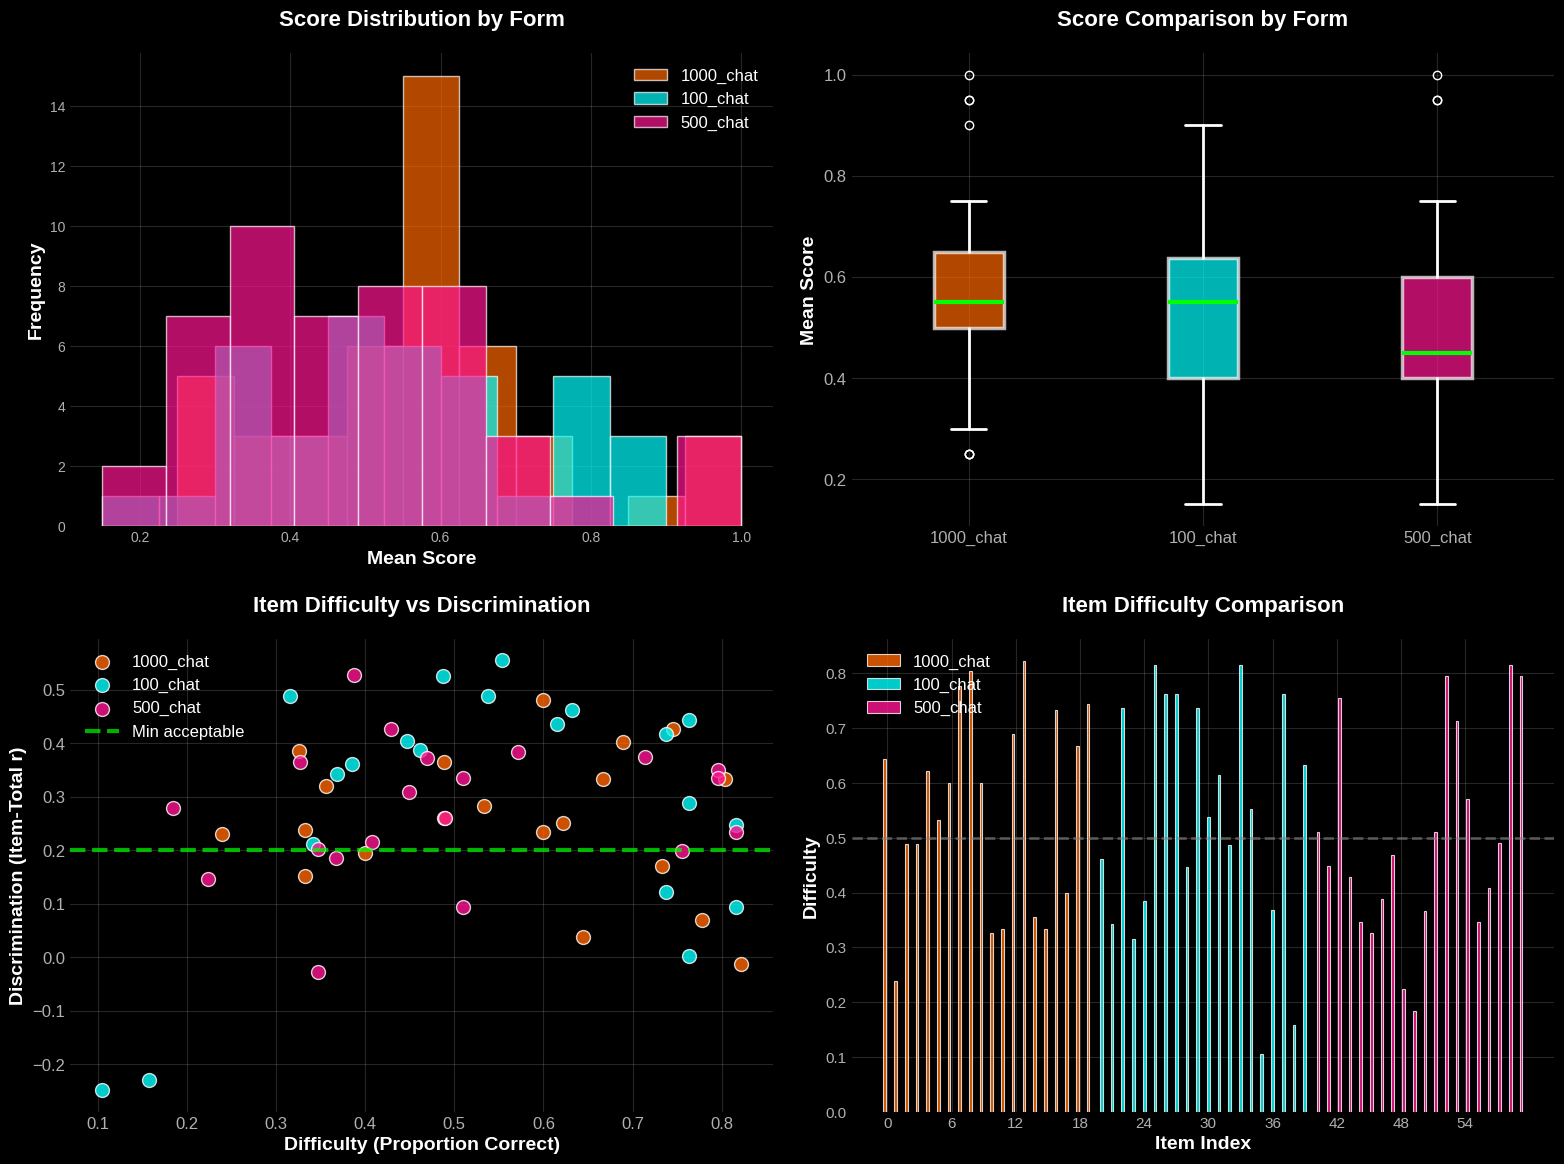

In [45]:
# DARK THEME VISUALIZATIONS - Use these for your presentation!
fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='black')

# Color scheme - NEON colors for dark background (highly distinct!)
colors = {'100_chat': '#00FFFF', '500_chat': '#FF1493', '1000_chat': '#FF6600'}  # Cyan, Pink, Orange

# Plot 1: Score distributions
ax = axes[0,0]
for form in sorted(participant_stats['form_name'].unique()):
    data = participant_stats[participant_stats['form_name']==form]['mean_score']
    ax.hist(data, alpha=0.7, label=form, bins=10, color=colors[form], edgecolor='white', linewidth=1)
ax.set_xlabel('Mean Score', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax.set_title('Score Distribution by Form', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3)

# Plot 2: Box plots
ax = axes[0,1]
form_names = sorted(participant_stats['form_name'].unique())
data = [participant_stats[participant_stats['form_name']==f]['mean_score'].values for f in form_names]
bp = ax.boxplot(data, labels=form_names, patch_artist=True,
                boxprops=dict(linewidth=2.5), whiskerprops=dict(linewidth=2),
                capprops=dict(linewidth=2), medianprops=dict(color='#00FF00', linewidth=3))
for patch, form in zip(bp['boxes'], form_names):
    patch.set_facecolor(colors[form])
    patch.set_alpha(0.7)
    patch.set_edgecolor('white')
ax.set_ylabel('Mean Score', fontsize=14, fontweight='bold')
ax.set_title('Score Comparison by Form', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')
ax.tick_params(labelsize=12)

# Plot 3: Difficulty vs Discrimination
ax = axes[1,0]
for form in sorted(item_stats['form_name'].unique()):
    d = item_stats[item_stats['form_name']==form]
    ax.scatter(d['difficulty'], d['discrimination'], alpha=0.8, label=form, 
              s=100, color=colors[form], edgecolors='white', linewidth=1)
ax.set_xlabel('Difficulty (Proportion Correct)', fontsize=14, fontweight='bold')
ax.set_ylabel('Discrimination (Item-Total r)', fontsize=14, fontweight='bold')
ax.axhline(0.2, color='#00FF00', linestyle='--', alpha=0.7, linewidth=3, label='Min acceptable')
ax.legend(fontsize=12, framealpha=0.9)
ax.set_title('Item Difficulty vs Discrimination', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=12)

# Plot 4: Item difficulty by form
ax = axes[1,1]
difficulty_comparison = item_stats.pivot(index='item_version_name', columns='form_name', values='difficulty')
x = np.arange(len(difficulty_comparison))
width = 0.25
for i, form in enumerate(sorted(difficulty_comparison.columns)):
    offset = width * (i - 1)
    ax.bar(x + offset, difficulty_comparison[form], width, label=form, 
          alpha=0.8, color=colors[form], edgecolor='white', linewidth=0.8)
ax.set_ylabel('Difficulty', fontsize=14, fontweight='bold')
ax.set_xlabel('Item Index', fontsize=14, fontweight='bold')
ax.set_title('Item Difficulty Comparison', fontsize=16, fontweight='bold', pad=20)
ax.axhline(0.5, color=muted_grey, linestyle='--', alpha=0.6, linewidth=2)
ax.legend(fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3, axis='y')
ax.tick_params(labelsize=11)
ax.set_xticks(x[::max(1, len(x)//10)])

plt.tight_layout(pad=2)
plt.savefig('../results/figures/analysis_dark_theme.png', dpi=300, bbox_inches='tight', facecolor='black')
print("✓ Dark theme figure saved to results/figures/analysis_dark_theme.png")
plt.show()


## 5. Reliability


In [46]:
def cronbach_alpha(df_wide):
    n = df_wide.shape[1]
    if n < 2: return np.nan
    item_var = df_wide.var(ddof=1)
    total_var = df_wide.sum(axis=1).var(ddof=1)
    return (n / (n-1)) * (1 - item_var.sum() / total_var)

for form in df_test['form_name'].unique():
    wide = df_test[df_test['form_name'] == form].pivot_table(
        index='delivery_id', columns='item_version_name', values='score'
    )
    alpha = cronbach_alpha(wide)
    n_items = wide.shape[1]
    n_participants = wide.shape[0]
    print(f"{form}: α = {alpha:.3f} ({n_items} items, {n_participants} participants)")


1000_chat: α = 0.686 (20 items, 45 participants)
500_chat: α = 0.710 (20 items, 49 participants)
100_chat: α = 0.742 (20 items, 38 participants)


## 7. Survey Correlations with Test Performance


In [47]:
# Extract survey responses (Likert scale items)
survey_items_list = [
    'Survey - History',
    'Survey - History Knowledge',
    'Survey - General History Knowledge'
]

# Get survey data
df_survey = df[df['item_name'].isin(survey_items_list)].copy()

# Pivot survey data to wide format
survey_wide = df_survey.pivot_table(
    index=['delivery_id', 'form_name'],
    columns='item_name',
    values='score',
    aggfunc='first'
).reset_index()

print(f"Survey responses collected from {len(survey_wide)} participants")
print(f"\nSurvey items (Likert scale 0-1, representing 1-5):")
for col in survey_wide.columns:
    if col not in ['delivery_id', 'form_name']:
        print(f"  - {col}")

# Merge with test performance
survey_with_performance = survey_wide.merge(
    participant_stats[['delivery_id', 'form_name', 'mean_score', 'total_correct']], 
    on=['delivery_id', 'form_name']
)

print(f"\nMerged dataset: {len(survey_with_performance)} participants with both survey and test data")
survey_with_performance.head()


Survey responses collected from 132 participants

Survey items (Likert scale 0-1, representing 1-5):
  - Survey - General History Knowledge
  - Survey - History
  - Survey - History Knowledge

Merged dataset: 132 participants with both survey and test data


,delivery_id,form_name,Survey - General History Knowledge,Survey - History,Survey - History Knowledge,mean_score,total_correct
0,03199100-99c9-477e-987f-6e8f0ea817ef,1000_chat,0.25,0.75,0.25,0.55,11.0
1,0e20b0bc-935a-4fa9-87f3-74005fc96ec5,500_chat,0.75,0.25,0.50,0.70,14.0
2,0f9e621a-4968-44cc-ab86-4ae77ca77720,1000_chat,0.50,1.00,0.50,0.45,9.0
3,0fb5ec5d-335c-41ef-91bf-4870a09fdda6,500_chat,0.00,0.00,0.00,0.35,7.0
4,11aa9399-2255-45a5-9605-7a32f2f9ccc6,500_chat,0.25,1.00,0.00,0.40,8.0


## 7.1 Correlation Analysis by Form


In [48]:
# Calculate correlations for each form
correlation_results = []

for form in sorted(survey_with_performance['form_name'].unique()):
    form_data = survey_with_performance[survey_with_performance['form_name'] == form]
    
    print(f"\n{'='*70}")
    print(f"CORRELATIONS FOR {form}")
    print(f"{'='*70}")
    print(f"N = {len(form_data)} participants\n")
    
    for survey_item in survey_items_list:
        if survey_item in form_data.columns:
            # Calculate Pearson correlation
            valid_data = form_data[[survey_item, 'mean_score']].dropna()
            
            if len(valid_data) > 2:
                corr, p_value = stats.pearsonr(valid_data[survey_item], valid_data['mean_score'])
                
                # Calculate Spearman correlation (for ordinal data)
                spearman_corr, spearman_p = stats.spearmanr(valid_data[survey_item], valid_data['mean_score'])
                
                correlation_results.append({
                    'form_name': form,
                    'survey_item': survey_item,
                    'n': len(valid_data),
                    'pearson_r': corr,
                    'pearson_p': p_value,
                    'spearman_rho': spearman_corr,
                    'spearman_p': spearman_p,
                    'significant': 'Yes' if p_value < 0.05 else 'No'
                })
                
                print(f"{survey_item}:")
                print(f"  Pearson r = {corr:.3f} (p = {p_value:.4f}) {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")
                print(f"  Spearman ρ = {spearman_corr:.3f} (p = {spearman_p:.4f})")
                print(f"  N = {len(valid_data)}")
                print()

# Create correlation dataframe
corr_df = pd.DataFrame(correlation_results)
corr_df = corr_df.round({'pearson_r': 3, 'pearson_p': 4, 'spearman_rho': 3, 'spearman_p': 4})



CORRELATIONS FOR 1000_chat
N = 45 participants

Survey - History:
  Pearson r = 0.109 (p = 0.4750) ns
  Spearman ρ = 0.067 (p = 0.6601)
  N = 45

Survey - History Knowledge:
  Pearson r = 0.533 (p = 0.0002) ***
  Spearman ρ = 0.397 (p = 0.0070)
  N = 45

Survey - General History Knowledge:
  Pearson r = 0.496 (p = 0.0005) ***
  Spearman ρ = 0.371 (p = 0.0120)
  N = 45


CORRELATIONS FOR 100_chat
N = 38 participants

Survey - History:
  Pearson r = 0.232 (p = 0.1614) ns
  Spearman ρ = 0.189 (p = 0.2555)
  N = 38

Survey - History Knowledge:
  Pearson r = 0.511 (p = 0.0010) **
  Spearman ρ = 0.577 (p = 0.0001)
  N = 38

Survey - General History Knowledge:
  Pearson r = 0.506 (p = 0.0012) **
  Spearman ρ = 0.539 (p = 0.0005)
  N = 38


CORRELATIONS FOR 500_chat
N = 49 participants

Survey - History:
  Pearson r = 0.159 (p = 0.2737) ns
  Spearman ρ = 0.168 (p = 0.2477)
  N = 49

Survey - History Knowledge:
  Pearson r = 0.500 (p = 0.0003) ***
  Spearman ρ = 0.409 (p = 0.0035)
  N = 49

Su

## 7.2 Summary Table of Correlations


In [49]:
# Display comprehensive correlation table
print("="*100)
print("CORRELATION SUMMARY: SURVEY RESPONSES vs TEST PERFORMANCE")
print("="*100)
print("\nPearson r = Linear correlation")
print("Spearman ρ = Rank-order correlation (better for ordinal/Likert data)")
print("Significance: * p<0.05, ** p<0.01, *** p<0.001")
print("\n" + "="*100)

# Pivot for easier comparison across forms
print("\n📊 PEARSON CORRELATIONS BY FORM:")
pearson_pivot = corr_df.pivot(index='survey_item', columns='form_name', values='pearson_r')
print(pearson_pivot.round(3).to_string())

print("\n📊 SPEARMAN CORRELATIONS BY FORM:")
spearman_pivot = corr_df.pivot(index='survey_item', columns='form_name', values='spearman_rho')
print(spearman_pivot.round(3).to_string())

print("\n📊 P-VALUES (Pearson) BY FORM:")
p_value_pivot = corr_df.pivot(index='survey_item', columns='form_name', values='pearson_p')
print(p_value_pivot.round(4).to_string())

# Detailed table
print("\n" + "="*100)
print("DETAILED CORRELATION TABLE")
print("="*100)
display_corr = corr_df[['form_name', 'survey_item', 'n', 'pearson_r', 'pearson_p', 
                         'spearman_rho', 'spearman_p', 'significant']]
print(display_corr.to_string(index=False))

# Export correlation results
corr_path = EXPERIMENT_PATH / 'results' / 'tables' / 'survey_correlations.csv'
corr_df.to_csv(corr_path, index=False)
print(f"\n✓ Correlation results saved to: {corr_path}")


CORRELATION SUMMARY: SURVEY RESPONSES vs TEST PERFORMANCE

Pearson r = Linear correlation
Spearman ρ = Rank-order correlation (better for ordinal/Likert data)
Significance: * p<0.05, ** p<0.01, *** p<0.001


📊 PEARSON CORRELATIONS BY FORM:
form_name                           1000_chat  100_chat  500_chat
survey_item                                                      
Survey - General History Knowledge      0.496     0.506     0.440
Survey - History                        0.109     0.232     0.159
Survey - History Knowledge              0.533     0.511     0.500

📊 SPEARMAN CORRELATIONS BY FORM:
form_name                           1000_chat  100_chat  500_chat
survey_item                                                      
Survey - General History Knowledge      0.371     0.539     0.343
Survey - History                        0.067     0.189     0.168
Survey - History Knowledge              0.397     0.577     0.409

📊 P-VALUES (Pearson) BY FORM:
form_name                          

## 7.3 Visualize Correlations


✓ Dark theme correlation plots saved to: ../results/figures/survey_correlations_dark_theme.png


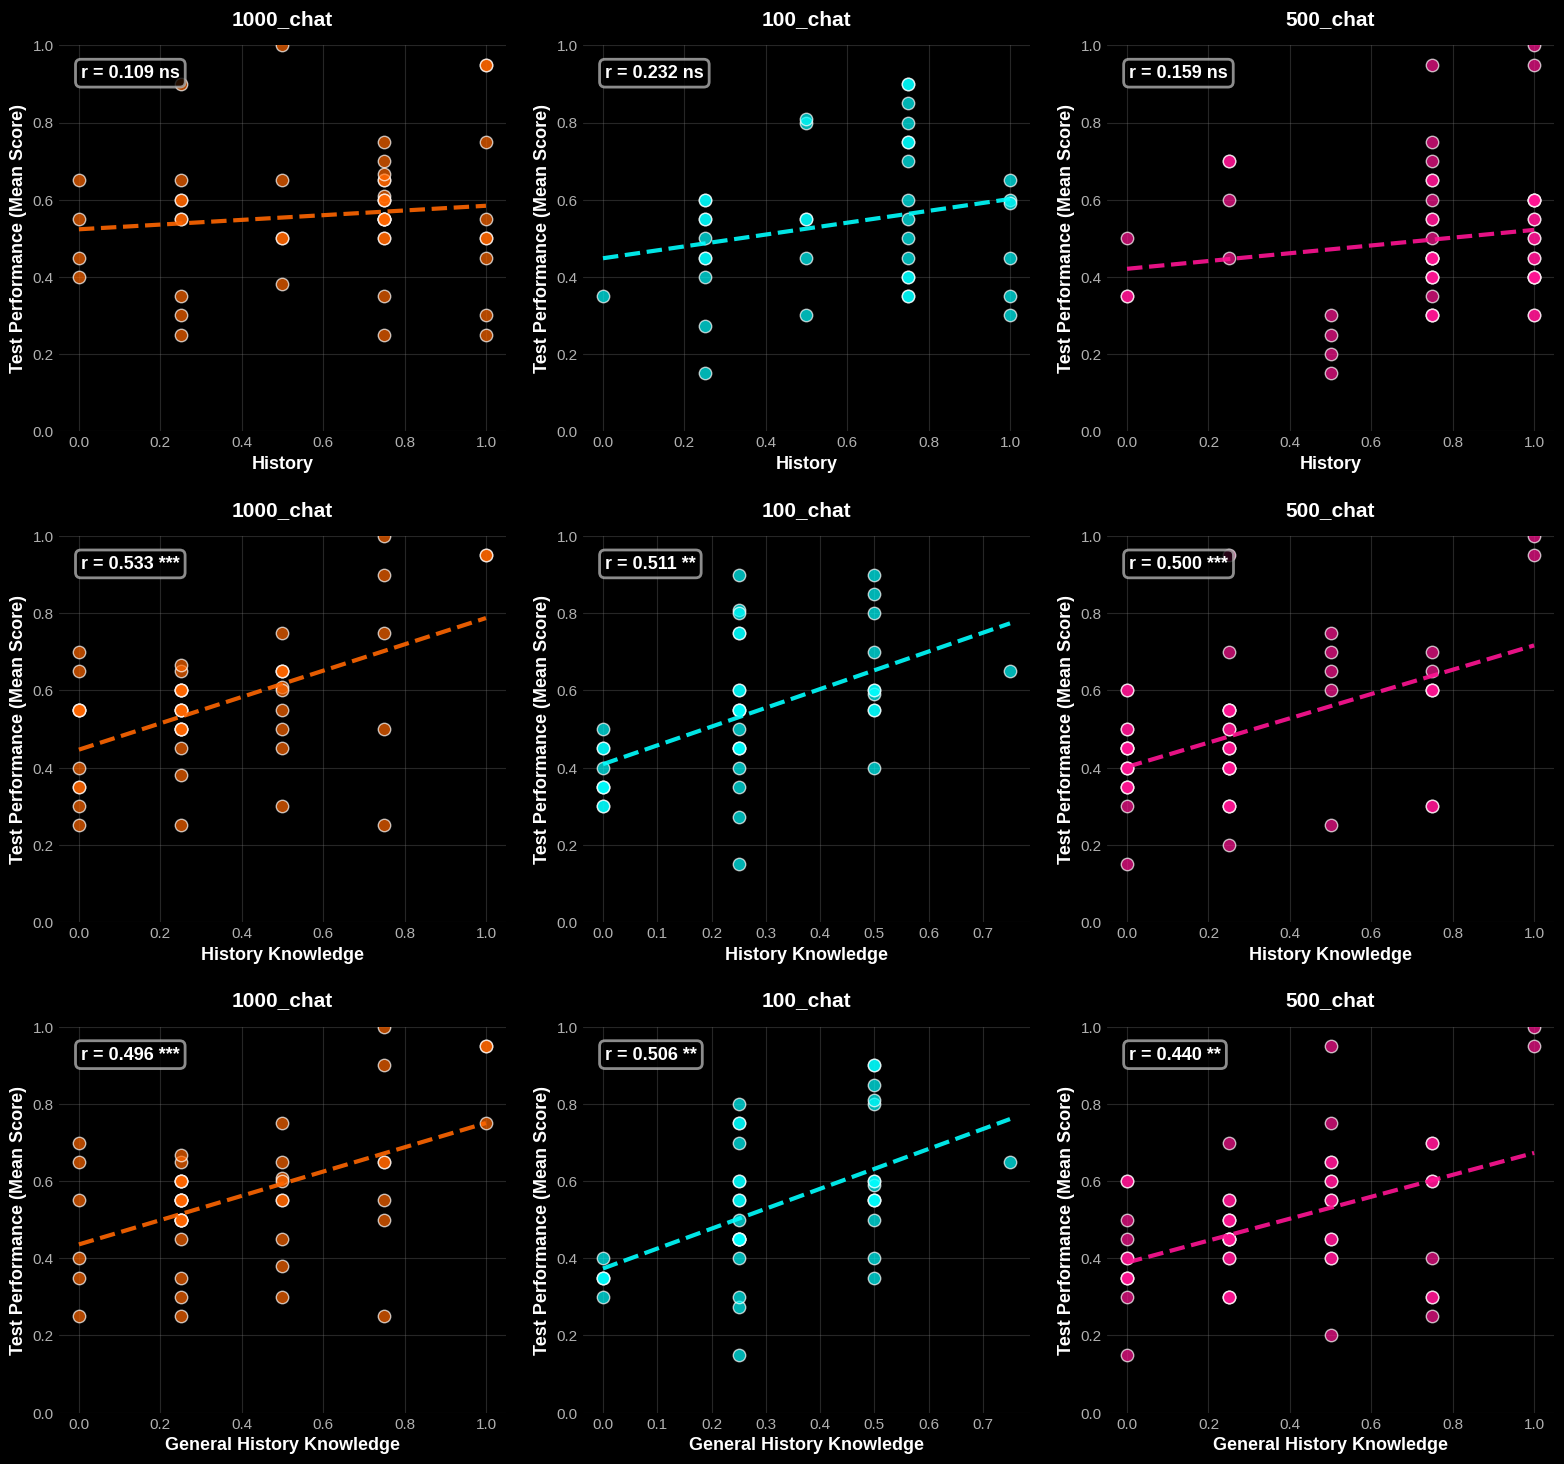

In [50]:
# DARK THEME CORRELATION PLOTS
fig, axes = plt.subplots(len(survey_items_list), 3, figsize=(16, 5*len(survey_items_list)), facecolor='black')

# Color scheme - NEON colors (matching main plots)
colors_form = {'100_chat': '#00FFFF', '500_chat': '#FF1493', '1000_chat': '#FF6600'}  # Cyan, Pink, Orange

for i, survey_item in enumerate(survey_items_list):
    for j, form in enumerate(sorted(survey_with_performance['form_name'].unique())):
        ax = axes[i, j] if len(survey_items_list) > 1 else axes[j]
        
        form_data = survey_with_performance[survey_with_performance['form_name'] == form]
        valid_data = form_data[[survey_item, 'mean_score']].dropna()
        
        if len(valid_data) > 0:
            # Scatter plot with dark theme colors
            ax.scatter(valid_data[survey_item], valid_data['mean_score'], 
                      alpha=0.7, s=80, color=colors_form[form], edgecolors='white', linewidth=1)
            
            # Add trend line
            if len(valid_data) > 2:
                z = np.polyfit(valid_data[survey_item], valid_data['mean_score'], 1)
                p = np.poly1d(z)
                ax.plot(valid_data[survey_item].sort_values(), 
                       p(valid_data[survey_item].sort_values()), 
                       color=colors_form[form], linestyle='--', alpha=0.9, linewidth=3)
                
                # Add correlation coefficient
                corr, p_val = stats.pearsonr(valid_data[survey_item], valid_data['mean_score'])
                sig_marker = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
                ax.text(0.05, 0.95, f'r = {corr:.3f} {sig_marker}', 
                       transform=ax.transAxes, verticalalignment='top', fontsize=13,
                       fontweight='bold', color='white',
                       bbox=dict(boxstyle='round', facecolor='black', edgecolor=light_grey, 
                                alpha=0.8, linewidth=2))
            
            ax.set_xlabel(survey_item.replace('Survey - ', ''), fontsize=13, fontweight='bold')
            ax.set_ylabel('Test Performance (Mean Score)', fontsize=13, fontweight='bold')
            ax.set_title(f'{form}', fontsize=15, fontweight='bold', pad=15)
            ax.grid(True, alpha=0.3)
            ax.set_ylim(0, 1)
            ax.tick_params(labelsize=11)

plt.tight_layout(pad=2)
corr_fig_path = EXPERIMENT_PATH / 'results' / 'figures' / 'survey_correlations_dark_theme.png'
plt.savefig(corr_fig_path, dpi=300, bbox_inches='tight', facecolor='black')
print(f"✓ Dark theme correlation plots saved to: {corr_fig_path}")
plt.show()


## 6. Visualizations


/tmp/ipykernel_48420/2843461809.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=form_names)


✓ Figure saved


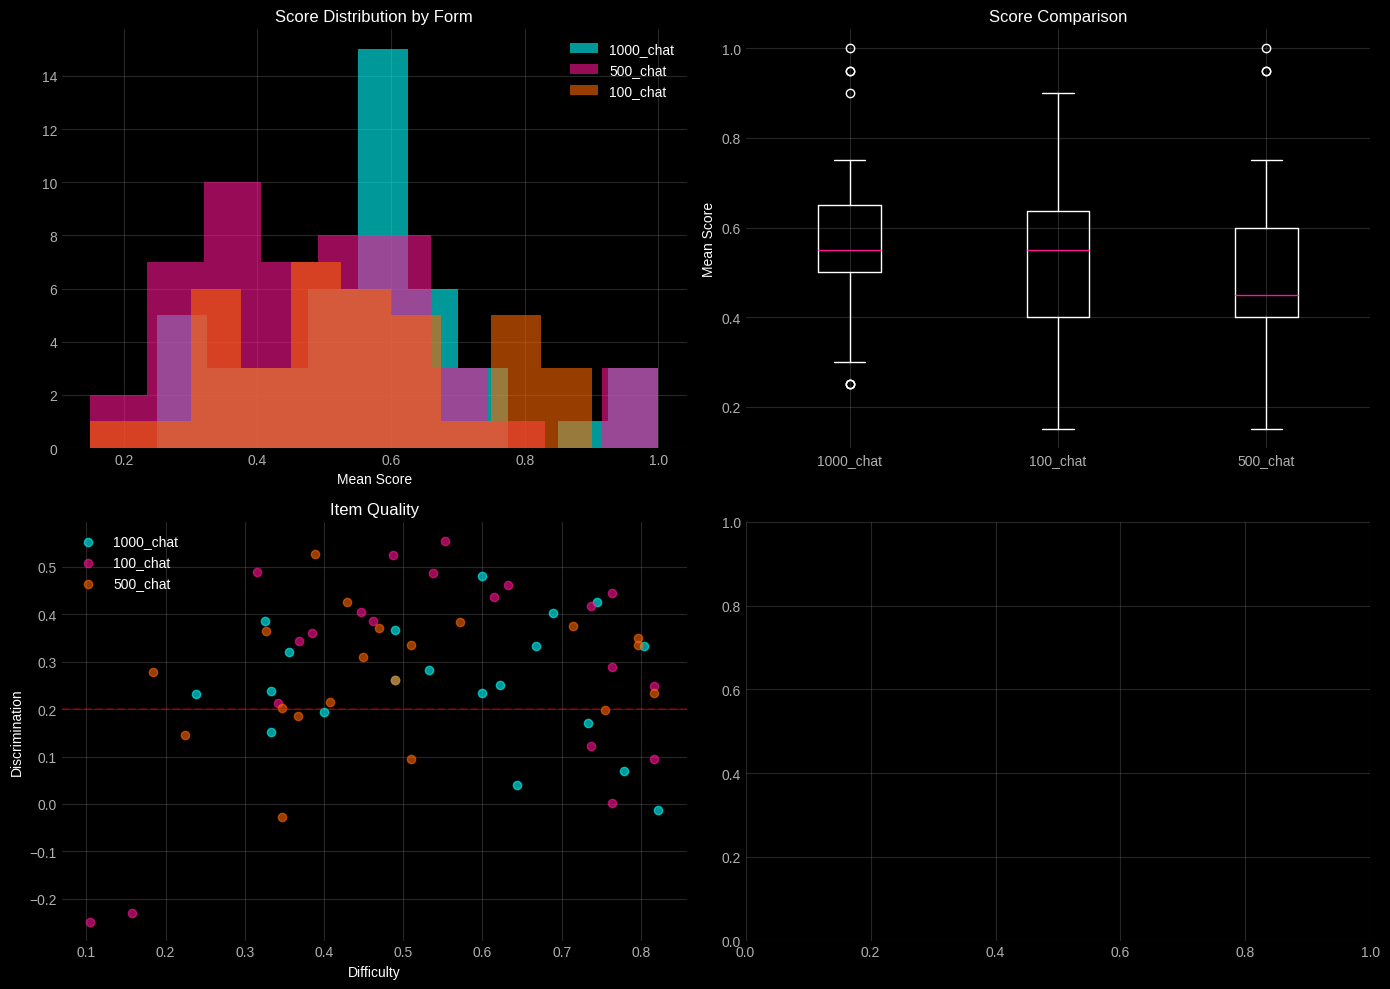

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Score distributions
ax = axes[0,0]
for form in participant_stats['form_name'].unique():
    data = participant_stats[participant_stats['form_name']==form]['mean_score']
    ax.hist(data, alpha=0.6, label=form, bins=10)
ax.set_xlabel('Mean Score')
ax.set_title('Score Distribution by Form')
ax.legend()

# Box plots
ax = axes[0,1]
form_names = sorted(participant_stats['form_name'].unique())
data = [participant_stats[participant_stats['form_name']==f]['mean_score'].values for f in form_names]
ax.boxplot(data, labels=form_names)
ax.set_ylabel('Mean Score')
ax.set_title('Score Comparison')

# Difficulty vs Discrimination
ax = axes[1,0]
for form in item_stats['form_name'].unique():
    d = item_stats[item_stats['form_name']==form]
    ax.scatter(d['difficulty'], d['discrimination'], alpha=0.6, label=form)
ax.set_xlabel('Difficulty')
ax.set_ylabel('Discrimination')
ax.axhline(0.2, color='r', linestyle='--', alpha=0.3)
ax.legend()
ax.set_title('Item Quality')

plt.tight_layout()
plt.savefig('../results/figures/analysis.png', dpi=300, bbox_inches='tight')
print("✓ Figure saved")
plt.show()
